# CSIRO Suspended Sediment Trend

Maintainer: Xavier Ho <xavier.ho@csiro.au>

This example uses the Analytics-Execution Engine of AGDC v2 to query Landsat 5 imagery. Two bands are combined to calculate an average, and the result is saved to an image.

In [11]:
from pprint import pprint
from datetime import datetime
import xarray as xr

import matplotlib
import matplotlib.image
%matplotlib inline

import datacube
from datacube.api import API, geo_xarray
from datacube.analytics.analytics_engine import AnalyticsEngine
from datacube.execution.execution_engine import ExecutionEngine
from datacube.analytics.utils.analytics_utils import plot

print('This example runs on Data Cube v2/{}.'.format(datacube.__version__))

This example runs on Data Cube v2/1.0.2+51.gd5a6f4b.


To set up the Engine, we first need to instantiate the modules and setup query parameters. 

`create_array` sets up the platform and product we are interested in querying, as well as the bands (variables) of the satellite data set. We also limit the amount of data processed by a long-lat boundary and time.

`apply_expressio`

INFO:datacube.analytics.analytics_engine:Initialise Analytics Module.
INFO:datacube.execution.execution_engine:Initialise Execution Module.


[u'LEDAPS', u'nbar', u'pqa']
[u'LANDSAT_5']
plot3D


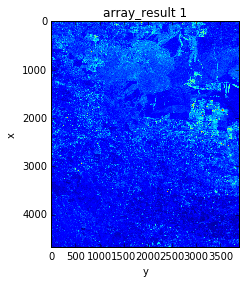

In [13]:
dc_a = AnalyticsEngine()
dc_e = ExecutionEngine()
dc_api = API()

print(dc_api.list_field_values('product')) # 'LEDAPS' should be in the list
print(dc_api.list_field_values('platform')) # 'LANDSAT_5' should be in the list

dimensions = {
    'x': {
        'range': (140, 141)
    },
    'y': {
        'range': (-35.5, -36.5)
    },
    'time': {
        'range': (datetime(2011, 10, 17), datetime(2011, 10, 18))
    }
}

green = dc_a.create_array(('LANDSAT_5', 'LEDAPS'), ['band3'], dimensions, 'green')
blue = dc_a.create_array(('LANDSAT_5', 'LEDAPS'), ['band2'], dimensions, 'blue')

approx = dc_a.apply_expression([green, blue], '(array1 + array2) / 2', 'approx') # Taking the mean of green and blue bands to approximate levels of sediments.

dc_e.execute_plan(dc_a.plan)
plot(dc_e.cache['approx'])

We can take the green and blue bands, take the average, and save it to file. The image is saved at the same location as the notebook root folder.

`geo_xarray.reproject` reprojects northings and eastings to longitude and latitude units.

<xarray.DataArray (y: 4406, x: 4626)>
array([[-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       ..., 
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.]])
Coordinates:
    time     datetime64[ns] 2011-10-17T00:15:48
  * y        (y) float64 -35.45 -35.45 -35.45 -35.45 -35.45 -35.45 -35.45 ...
  * x        (x) float64 139.9 139.9 139.9 139.9 139.9 139.9 139.9 139.9 ...


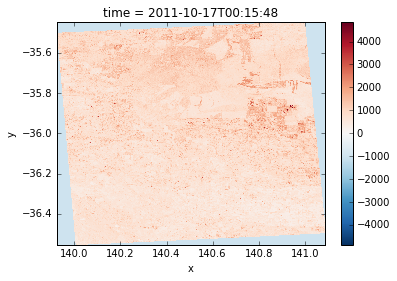

In [10]:
result = dc_e.cache['approx']['array_result']['approx']
reprojected = datacube.api.geo_xarray.reproject(result.isel(time=0), 'EPSG:3577', 'WGS84')

pprint(reprojected)

reprojected.plot.imshow()

matplotlib.image.imsave('approx.png', reprojected)

The boundaries are as follows:

In [7]:
map(float, (reprojected.x[0], reprojected.x[-1], reprojected.y[0], reprojected.y[-1]))

[139.92372282115778,
 141.08644592491765,
 -35.44609059117283,
 -36.55351774101416]